# Build Workflow

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
%config Application.log_level="DEBUG"
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [19]:
import os.path

In [20]:
from tabulate import tabulate
from pprint import pprint

In [21]:
from fireworks.utilities.wfb import WorkflowBuilder

## Substrate 250 Ang cube

In [48]:
prefix= '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/substrate/AU/111/250Ang_cube'
wfb = WorkflowBuilder(os.path.join(prefix,'system.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise
    
### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/substrate/AU/111/250Ang_cube/system.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 9 nodes: ['fw_000_file_retrieval.yaml', 'fw_010_datafile_retrieval.yaml', 'fw_020_minimization_fixed_box.yaml', 'fw_030_minimization_relaxed_box.yaml', 'fw_060_equilibration_nvt_bulk.yaml', 'fw_070_equilibration_npt_bulk.yaml', 'fw_100_extract_property.yaml', 'fw_150_remote_file_transfer.yaml', 'fw_200_filepad_add.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 12 edges: [('fw_000_file_retrieval.yaml', 'fw_010_datafile_retrieval.yaml'), ('fw_000_file_retrieval.yaml', 'fw_020_minimization_fixed_box.yaml'), ('fw_000_file_retrieval.yaml', 'fw_030_minimization_relaxed_box.yaml'), ('fw_000_file_retrieval.yaml', 'fw_060_equilibration_nvt_bulk.yaml'), ('fw_000_file_retrieval.yaml', 'fw_070_equilibra

INFO:fireworks.utilities.wfb:Added vertex 16 - fw_150_remote_file_transfer.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 17 - fw_200_filepad_add.yaml_000010
INFO:fireworks.utilities.wfb:Added edge 12 - (9-10)
INFO:fireworks.utilities.wfb:Added edge 13 - (9-11)
INFO:fireworks.utilities.wfb:Added edge 14 - (9-12)
INFO:fireworks.utilities.wfb:Added edge 15 - (9-13)
INFO:fireworks.utilities.wfb:Added edge 16 - (9-14)
INFO:fireworks.utilities.wfb:Added edge 17 - (10-11)
INFO:fireworks.utilities.wfb:Added edge 18 - (11-12)
INFO:fireworks.utilities.wfb:Added edge 19 - (12-13)
INFO:fireworks.utilities.wfb:Added edge 20 - (13-14)
INFO:fireworks.utilities.wfb:Added edge 21 - (14-15)
INFO:fireworks.utilities.wfb:Added edge 22 - (14-17)
INFO:fireworks.utilities.wfb:Added edge 23 - (15-16)
INFO:fireworks.utilities.wfb:          Instance 9 - 10 - fw_000_file_retrieval.yaml_000010 of class 0 - fw_000_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content u

INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 2, 3, 4, 5, 8, 6, 7]
INFO:fireworks.utilities.wfb:0: fw_000_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_010_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_020_minimization_fixed_box.yaml_000010_000020.
INFO:fireworks.utilities.wfb:Iterating node 2: fw_020_minimization_fixed_box.yaml_000010_000020
INFO:fireworks.utilities.wfb:2: fw_020_minimization_fixed_box.yaml_000010_000020, dist. 2, top.pos. 2 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_000_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  1: fw_010_datafile_retrieval.yaml_000020, dist. 1, top. pos. 1
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [1]
INFO:fireworks.utilities.wfb:  1: fw_010_datafile_retrieval.yaml_000020, dist. 1, top. pos. 1 selected as immediate parent
INFO:fireworks.utiliti

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 1
DEBUG:fireworks.utilities.wfb:  Parent name: fw_020_minimization_fixed_box.yaml_000030
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/AU_111_250Ang_cube/series1', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/charmmfsh.input', 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': 'AU_111_250Ang_cube', 'state': 'initial config', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_250Ang_cube', 'sb_area': 6.25e-16, 'sb_area_unit': 'm^2', 'sb_base_length': 250, 'sb_base_length_unit': 'Ang',

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_030_minimization_relaxed_box.yaml_000040:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/AU_111_250Ang_cube/series1', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/charmmfsh.input', 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': 'AU_111_250Ang_cube', 'state': 'initial

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/AU_111_250Ang_cube/series1', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/charmmfsh.input', 'worker': 'nemo_queue_offline', 'nodes': 1, 'ppn': 20, 'walltime': 3600, 'queue': '', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': 'AU_111_250Ang_cube', 'state': 'initial config', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_250Ang_cube', 'sb_area': 6.25e-16, 'sb_area_unit': 'm^2', 'sb_base_length': 250, 'sb_base_length_unit': 'Ang', 'sb_crystal_plane': 111, 'sb_lattice_constant': 4.075, 'sb_lattice_constant

INFO:fireworks.utilities.wfb:Added vertex 9 - fw_150_remote_file_transfer.yaml_000010_000020_000030_000040_000050_000060_000070
INFO:fireworks.utilities.wfb:Added vertex 10 - fw_100_extract_property.yaml_000010_000020_000030_000040_000050_000060_000070
INFO:fireworks.utilities.wfb:Added edge 12 - (6-10)
INFO:fireworks.utilities.wfb:Added edge 13 - (10-9)
INFO:fireworks.utilities.wfb:          Instance 10 - 70 - fw_100_extract_property.yaml_000070 of class 7 - fw_100_extract_property.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_000_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 7, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 7: fw_150_remote_file_transfer.yaml_000010_000020_000030_000040_000050_000060_000070
INFO:fireworks.utilities.wfb:Current topological order

INFO:fireworks.utilities.wfb:8: fw_150_remote_file_transfer.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_200_filepad_add.yaml_000010_000020_000030_000040_000050_000060.
INFO:fireworks.utilities.wfb:Iterating node 5: fw_200_filepad_add.yaml_000010_000020_000030_000040_000050_000060
INFO:fireworks.utilities.wfb:5: fw_200_filepad_add.yaml_000010_000020_000030_000040_000050_000060, dist. 6, top.pos. 6 has 1 parents with distances [5]:
INFO:fireworks.utilities.wfb:  6: fw_070_equilibration_npt_bulk.yaml_000060, dist. 5, top. pos. 7
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [6]
INFO:fireworks.utilities.wfb:  6: fw_070_equilibration_npt_bulk.yaml_000060, dist. 5, top. pos. 7 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 1
DEBUG:fireworks.utilities.wfb:  Parent name: fw_070_equilibration_npt_bulk.yaml_000060
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'remote_use

INFO:fireworks.utilities.wfb:fw_id  -40: fw_030_minimization_relaxed_box.yaml_000040
INFO:fireworks.utilities.wfb:fw_id  -50: fw_060_equilibration_nvt_bulk.yaml_000050
INFO:fireworks.utilities.wfb:fw_id  -60: fw_070_equilibration_npt_bulk.yaml_000060
INFO:fireworks.utilities.wfb:fw_id  -70: fw_100_extract_property.yaml_000070
INFO:fireworks.utilities.wfb:fw_id  -80: fw_150_remote_file_transfer.yaml_000080
INFO:fireworks.utilities.wfb:fw_id  -90: fw_200_filepad_add.yaml_000090


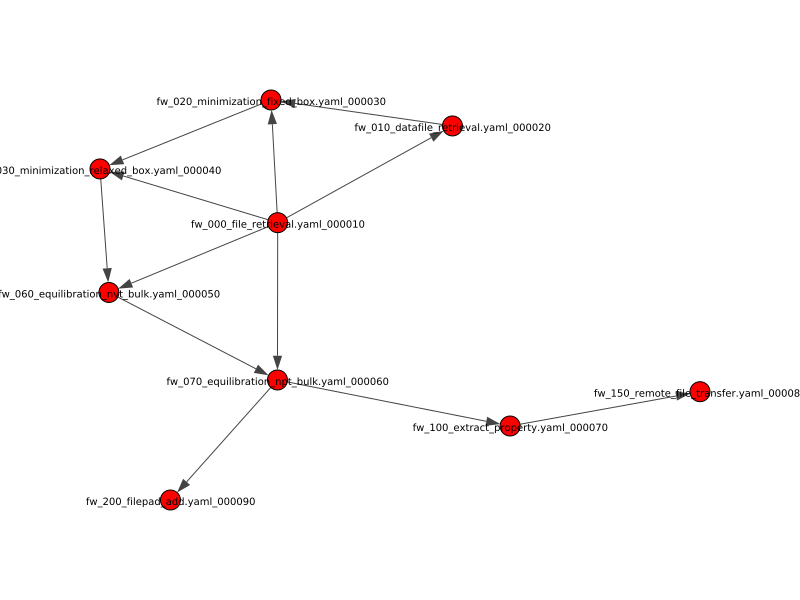

In [49]:
wfb.plot()